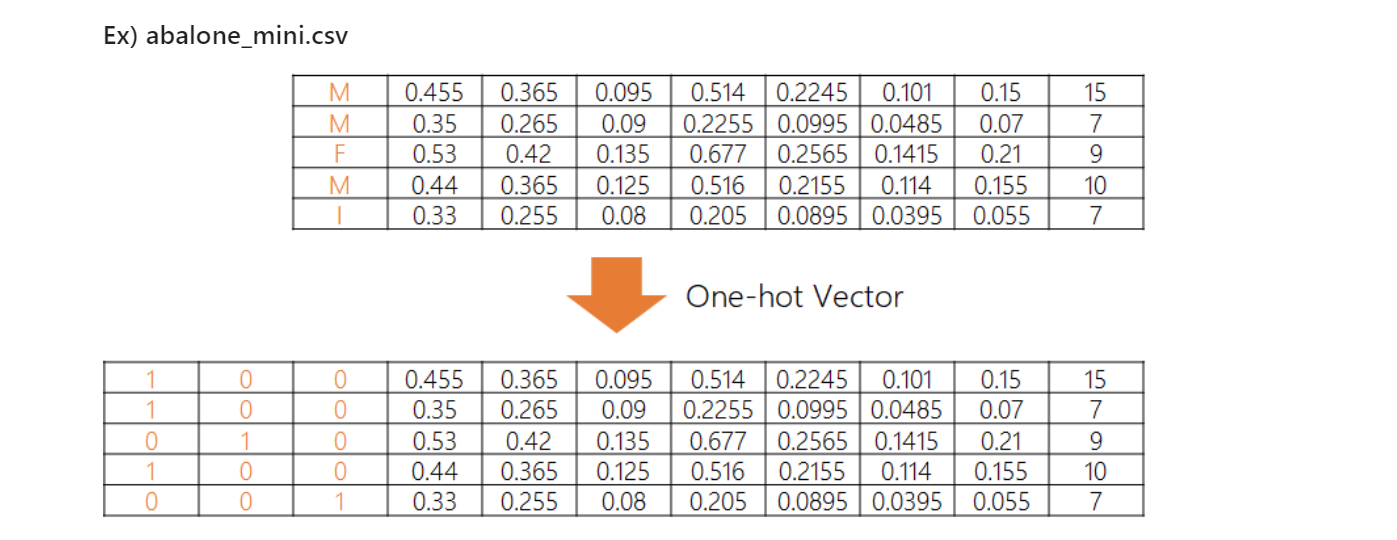

##One_hot_vector 구현 
for if np.zeros ,enumerate() 사용하여 구현 

In [ ]:
import csv
import numpy as np

In [ ]:
with open('/content/abalone_mini.csv') as abalonefile:
  abalonereader = csv.reader(abalonefile)
  rows = []
  for row in abalonereader:
    rows.append(row)
    


In [ ]:
print(rows)

[['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15'], ['M', '0.35', '0.265', '0.09', '0.2255', '0.0995', '0.0485', '0.07', '7'], ['F', '0.53', '0.42', '0.135', '0.677', '0.2565', '0.1415', '0.21', '9'], ['M', '0.44', '0.365', '0.125', '0.516', '0.2155', '0.114', '0.155', '10'], ['I', '0.33', '0.255', '0.08', '0.205', '0.0895', '0.0395', '0.055', '7']]


In [ ]:
data= np.zeros([5,11]) 
#행 은 5개의고 M 한글자 str 이 3개의 intizer 숫자로 바뀌기 떄문에 8(수)+3(str- > 수) =11
print(data)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
for row in rows:
  print(row)

['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15']
['M', '0.35', '0.265', '0.09', '0.2255', '0.0995', '0.0485', '0.07', '7']
['F', '0.53', '0.42', '0.135', '0.677', '0.2565', '0.1415', '0.21', '9']
['M', '0.44', '0.365', '0.125', '0.516', '0.2155', '0.114', '0.155', '10']
['I', '0.33', '0.255', '0.08', '0.205', '0.0895', '0.0395', '0.055', '7']


In [ ]:
for i,row in enumerate(rows):
  print(i,row)
print(data)

0 ['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15']
1 ['M', '0.35', '0.265', '0.09', '0.2255', '0.0995', '0.0485', '0.07', '7']
2 ['F', '0.53', '0.42', '0.135', '0.677', '0.2565', '0.1415', '0.21', '9']
3 ['M', '0.44', '0.365', '0.125', '0.516', '0.2155', '0.114', '0.155', '10']
4 ['I', '0.33', '0.255', '0.08', '0.205', '0.0895', '0.0395', '0.055', '7']
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
for i,row in enumerate(rows):
  if row[0] == 'M': #str 부분을 one_hot vector 로 변경 
    data[i,0] =1
  if row[0] == 'F':
    data[i,1] = 1
  if row[0] == 'I':
    data[i,2] = 1 
  data[i,3:] = row[1:] #나머지 종속 변수 복사
print(data)

[[ 1.      0.      0.      0.455   0.365   0.095   0.514   0.2245  0.101
   0.15   15.    ]
 [ 1.      0.      0.      0.35    0.265   0.09    0.2255  0.0995  0.0485
   0.07    7.    ]
 [ 0.      1.      0.      0.53    0.42    0.135   0.677   0.2565  0.1415
   0.21    9.    ]
 [ 1.      0.      0.      0.44    0.365   0.125   0.516   0.2155  0.114
   0.155  10.    ]
 [ 0.      0.      1.      0.33    0.255   0.08    0.205   0.0895  0.0395
   0.055   7.    ]]


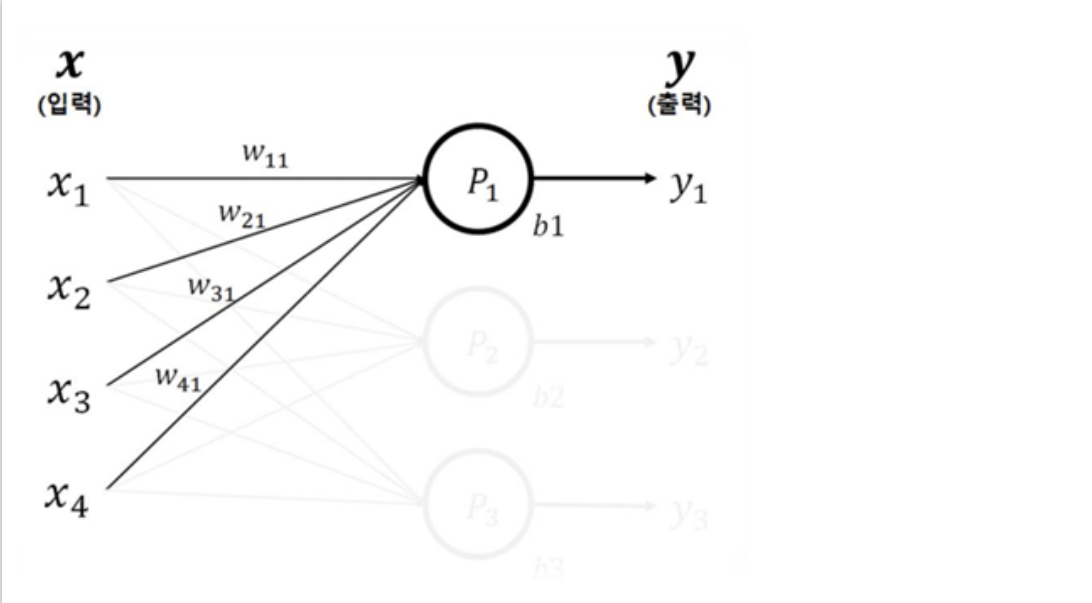

# 1. 가중치(weight) / 편향(bias) -> 파라미터 parameter

# y_1 = (x_1 * w_1 + x_2 * w_2 + ... + x_n * w_n) + bias

#loss = y-y_hat y_hat 을 구하고  activation function 을 이용해 

In [ ]:
def main_exec(x,y):
  #import_data() -> 데이터 모으는 함수 
  model_init() #모델 생성하는 함수 
  run_train(x,y) #학습 하는 함수 


In [ ]:
RND_MEAN = 0
RND_STD = 1

input_cnt = 10
output_cnt = 1
def model_init(): #model 의 가중치와 bias 편향을 구한는 함수 
  global weight,bias 
  #global 로 선언하면 다른 함수 에서나 어디든지 사용가능 / 단 상수 처리가 되어 값 변경불가
  weight = np.random.normal(RND_MEAN,RND_STD,size = [input_cnt,output_cnt])
  bias = np.random.normal(RND_MEAN,RND_STD,size = [output_cnt]) #bias 는 1개
  '''
  np.random.normal(RND_MEAN,RND_STD,size = [input_cnt,output_cnt])
  넘파이의 랜덤 정규 분포로 구하는 메소드 
  (평균,표준편차,size = [x,y]) = 10행 1열 의 size 이다
  '''



In [ ]:
weight = np.random.normal(RND_MEAN,RND_STD,size = [input_cnt,output_cnt])
print(weight)
bias = np.random.normal(RND_MEAN,RND_STD, size = [output_cnt])
print(bias)

[[ 0.12830156]
 [-1.27565165]
 [ 0.44577436]
 [-0.59591913]
 [-1.49216814]
 [-0.67119565]
 [-0.53619218]
 [-0.96400389]
 [ 0.96359492]
 [ 0.08622428]]
[-0.47879872]


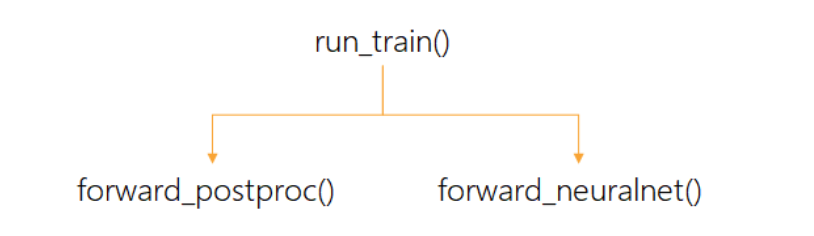

In [ ]:
#run train 
'''
forward_postproc() = loss function 구하기 

forward_neuralnet() = 행렬곱 구하는 방법 
(x1*w1 + x2*w2 + ..... xn*wn) + bias
지금부터 함수 안에 함수를 만드는 구조이다 
'''

#forward_nueralnet
def forward_neuralnet(x):
  y_hat = np.matmul(x,weight) + bias #np.matmul(x,y) : x,y의 행렬곱 구하기 
  return y_hat


In [ ]:
forward_neuralnet(data[:,:-1]) #종속변수를 제외하고 나머지 값 가져온 다음에 행렬곱 구하기 

array([[-1.61181025],
       [-1.1789607 ],
       [-3.24342287],
       [-1.60244583],
       [-0.81726962]])

In [ ]:
#forward_postproc() 만들기  = loss function 만들기
def forward_postproc(y_hat,y):
  diff = y_hat - y
  square = np.square(diff)
  mse = np.mean(square)
  return mse


In [ ]:
#forward_postproc(forward_nueralnet(data[:,:-1]),data[:,-1:])



In [ ]:
def run_train(x,y): #행렬곱과 loss function 구하는 함수 
  output = forward_nueralnet(x)
  loss = forward_postproc(output,y)
  return output,loss

In [ ]:
#print(run_train(data[:,:-1],data[:,-1:]))

In [ ]:
#main_exec(data[:, :-1], data[:, -1:])

#Fashion_mnist 파일을 사용하여 순전파 데이터 학습하기 

(라이브러리 함수가 아니라 가중치와 bias 를 랜덤으로 구한다음에)
x data = fashion_mnist 데이터에 한 이미지 만 가져올것이다.

but 그 이미지가 2차원 행렬이기 때문에 1차원 행 = 1레이블 구조를 맞춰줘야 한다.

pd 를 이용하여 가중치와 편향 input data 를 
하나의 데이터 프레임으로 만든다.


행렬곱+ 편향으로 예측값 구한다음 
softmax 함수 실행 

softmax 의 overflow underflow 문제를 해결하기 위해 
y_hat 예측 값중에 가장 큰값을 뺴준다.
softmax 값중에 가장 큰값을 가져와 그값의 인덱스를 출력  끝

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

In [2]:
#fashion_mnist : keras 에 있는 패션 이미지 데이터 
fashion_mnist = tf.keras.datasets.fashion_mnist

In [5]:
#x,y train set test set 분리 하여 저장 
'''
train_set 60000개 
test_set 10000개 
''' 
(train_X,train_Y) ,(test_X,test_Y)  = fashion_mnist.load_data()

print(train_X.shape)
print(train_X[0].shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(60000, 28, 28)
(28, 28)
(60000,)
(10000, 28, 28)
(10000,)


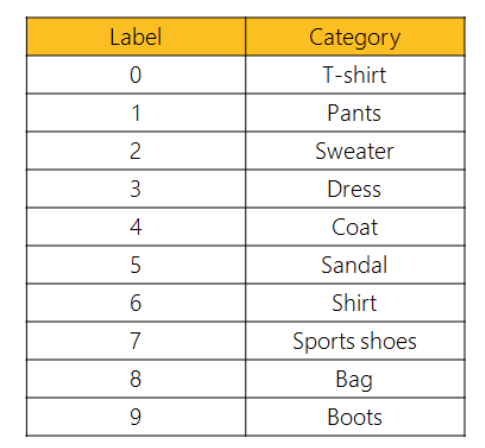

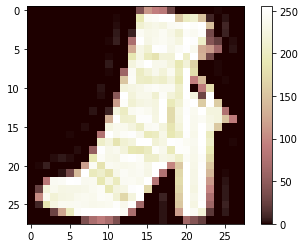

In [ ]:
plt.imshow(train_X[11],cmap = 'pink') 
#plt.imshow(imagedata,cmap = color)
'''
imshow = 이미지를 보여주기 위한 plt 함수 
x =  보고싶은 이미지 데이터 
cmap  = 배경색? 
'''
plt.colorbar()
'''
plt.colorbar() 이미지 의 rgb 값을 수치로 나타내어 바 형태로 보여주는함수
'''
plt.show() 

In [ ]:
print(train_Y[11])  #train_Y 에 있는 11번쨰 이미지 의 옷 종류 레이블 
print(train_X[11])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  39 111  93  85
   27   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0 190 244 248 255
  255 155 202 212 150   9   0   3   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2   0   0 213 227 233 227
  243 246 255 250 255 146   0   9   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   4   0   6 244 233 236 244
  232 214 248 242 251  33   0   7   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   6   0  72 255 231 239 244
  237 226 255 252 207  44  24   0   2   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 125 231 215 253 252
  234 246 254 239 128 114  63   0   3   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0 189 230 198 185 219
  218 255 206 255 133  31   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   4   0   0 224 241 255 236 237
  223 191 219 166   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0  61 245 202 

In [ ]:
print(train_X[0].shape)
print(train_X[0].ndim)
'''
1개의 이미지 데이터가 
2차원 행렬이기 떄문에 
이를 1차원 1레이블 형태로 만들어서 학습해야 한다.
'''


(28, 28)
2


'\n1개의 이미지 데이터가 \n2차원 행렬이기 떄문에 \n이를 1차원 1레이블 형태로 만들어서 학습해야 한다.\n'

In [ ]:
train_X_flat = train_X[0].flatten() 
#flatten 함수 는 dim 을 한 차원 낮추는 함수 이다.
print(train_X_flat.shape) # 2차원 데이터를 1차원으로 변경 했다
print(train_X_flat.ndim) #차원도 확인해보면 1차원이다.

(784,)
1


In [ ]:
#x data 개수랑 중복없는 y 레이블의 개수 구하기  
input_X = len(train_X_flat)
output_Y = len(set(train_Y))

print(input_X , output_Y)



784 10


In [ ]:
#가중치랑 편향 값 정규분포 랜덤 함수로 배정 

RAN_Mean = 0 #평균 0 
RAN_Std = 1  #표준편차 1

weight = np.random.normal(RAN_Mean,RAN_Std ,size = [input_X,output_Y])
print(weight.shape)
print(weight.ndim)
bias = np.random.normal(RAN_Mean,RAN_Std,size = [output_Y])

print(bias.shape)
print(bias.ndim)

(784, 10)
2
(10,)
1


In [ ]:
parameter = {'w':weight,'b':bias}
print(parameter['w'].shape)
print(parameter['w'].ndim)
print(parameter['w'][0]) #가중치 테이블 의 전부가 다있다.

print(parameter['b'].shape)
print(parameter['b'].ndim)
print(parameter['b'])

(784, 10)
2
[-0.3765167  -1.62690004  0.43757642 -0.52039987 -0.62926921  1.60051165
  1.3779727  -0.09318445  1.72803288 -0.28637797]
(10,)
1
[-0.25371398 -0.8356413  -1.32802087 -0.07314618  0.45783037  0.01746481
 -0.45395477  1.01973338  0.26448505 -1.17822476]


In [ ]:
#DataFrame 으로 input 값 ,weight 값 ,bias 값 을 정리 

df_w = pd.DataFrame(parameter['w'],
                    columns = ['w1','w2','w3','w4','w5','w6','w7','w8','w9','w10'])
df_b = pd.DataFrame(parameter['b'],
                    columns = ['b'])
df_x = pd.DataFrame(train_X_flat,columns = ['input_data'])

print(df_w)
print(df_b)
print(df_x)

           w1        w2        w3  ...        w8        w9       w10
0   -0.376517 -1.626900  0.437576  ... -0.093184  1.728033 -0.286378
1   -0.587954  1.031754 -1.086179  ... -0.862556 -1.157918 -0.044877
2    0.588725 -0.429594  0.976490  ...  0.562671  0.595315 -0.584997
3   -1.322579  0.879736  0.582599  ...  0.217472 -0.110514  0.845585
4    0.228854 -2.249213  0.530953  ...  1.463397 -1.103072 -0.938246
..        ...       ...       ...  ...       ...       ...       ...
779  0.010224 -1.502387  1.896722  ...  1.856436 -0.127386  0.530822
780  1.976365 -2.122983 -0.258362  ...  1.391120 -2.173636 -0.285124
781 -1.017169 -1.563785  1.000785  ... -2.061588  1.412451 -0.549779
782  0.094970  0.291433 -0.868914  ...  0.848650  1.649874 -2.043508
783  0.013970  0.972144 -1.033124  ...  1.278908 -0.602828 -0.147323

[784 rows x 10 columns]
          b
0 -0.253714
1 -0.835641
2 -1.328021
3 -0.073146
4  0.457830
5  0.017465
6 -0.453955
7  1.019733
8  0.264485
9 -1.178225
     input_data

In [ ]:
#3개의 데이터 프레임을 합치기 pandas .concat

df_data = pd.concat([df_x,df_w,df_b],axis =1) #axis 1이 열로 정리 한다

'''
pd.concat([data 이름],axis = 0/1) 
'''
display(df_data)


,input_data,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,b
0,0,-0.376517,-1.626900,0.437576,-0.520400,-0.629269,1.600512,1.377973,-0.093184,1.728033,-0.286378,-0.253714
1,0,-0.587954,1.031754,-1.086179,0.290949,1.012542,1.653167,0.594342,-0.862556,-1.157918,-0.044877,-0.835641
2,0,0.588725,-0.429594,0.976490,-1.394768,0.626757,1.872515,1.389636,0.562671,0.595315,-0.584997,-1.328021
3,0,-1.322579,0.879736,0.582599,-0.361411,-2.173671,0.479944,0.945353,0.217472,-0.110514,0.845585,-0.073146
4,0,0.228854,-2.249213,0.530953,0.265800,-0.578335,-0.032554,-0.507576,1.463397,-1.103072,-0.938246,0.457830
...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,0.010224,-1.502387,1.896722,0.533098,-0.194287,-0.578222,0.675402,1.856436,-0.127386,0.530822,NaN
780,0,1.976365,-2.122983,-0.258362,1.897503,-1.178568,1.721842,-0.361065,1.391120,-2.173636,-0.285124,NaN
781,0,-1.017169,-1.563785,1.000785,-0.664684,0.026889,0.605541,-0.339654,-2.061588,1.412451,-0.549779,NaN
782,0,0.094970,0.291433,-0.868914,0.535450,0.195493,-0.079976,0.305022,0.848650,1.649874,-2.043508,NaN


In [ ]:
y_hat_1 = np.matmul(df_data['input_data'], df_data['w1']) + df_data['b'][0]
y_hat_2 = np.matmul(df_data['input_data'], df_data['w2']) + df_data['b'][1]
y_hat_3 = np.matmul(df_data['input_data'], df_data['w3']) + df_data['b'][2]
y_hat_4 = np.matmul(df_data['input_data'], df_data['w4']) + df_data['b'][3]
y_hat_5 = np.matmul(df_data['input_data'], df_data['w5']) + df_data['b'][4]
y_hat_6 = np.matmul(df_data['input_data'], df_data['w6']) + df_data['b'][5]
y_hat_7 = np.matmul(df_data['input_data'], df_data['w7']) + df_data['b'][6]
y_hat_8 = np.matmul(df_data['input_data'], df_data['w8']) + df_data['b'][7]
y_hat_9 = np.matmul(df_data['input_data'], df_data['w9']) + df_data['b'][8]
y_hat_10 = np.matmul(df_data['input_data'], df_data['w10']) + df_data['b'][9]

#행렬곱 구하기 



In [ ]:
print(y_hat_1)
print(y_hat_2)
print(y_hat_3)
print(y_hat_4)
print(y_hat_5)
print(y_hat_6)
print(y_hat_7)
print(y_hat_8)
print(y_hat_9)
print(y_hat_10)

3932.728757742448
3923.168945255634
851.2639642764527
5879.497160022804
12183.33229546864
1142.553627029644
1159.9051555528924
463.21512706364746
218.9452216829208
9304.962242492142


In [ ]:
y_hat_total = np.matmul(df_data['input_data'],parameter['w']) + parameter['b']
print(y_hat_total)

[ 3932.72875774  3923.16894526   851.26396428  5879.49716002
 12183.33229547  1142.55362703  1159.90515555   463.21512706
   218.94522168  9304.96224249]


In [ ]:
print(np.exp(y_hat_total)) #overflow error 발생 

[            inf             inf             inf             inf
             inf             inf             inf 1.48516128e+201
 1.22096051e+095             inf]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [ ]:
#softmax function 해결 
fmnist_max = np.max(y_hat_total) #
diff_y_hat_row = [] #차이를 구해서  ovweflow 문제를 해결하자

for i in y_hat_total:
  
  diff_y_hat = i - fmnist_max

  diff_y_hat_row.append(diff_y_hat)


'''
-3826.5738887436455
-5757.506592178378
-9227.471411569379
0.0 최대 - 최대 
-7882.496094089752
-1356.213001983976
-7253.529928007297
-1793.8688929392342
-12595.660123679834
-3737.4361179602643
'''


'\n-3826.5738887436455\n-5757.506592178378\n-9227.471411569379\n0.0 최대 - 최대 \n-7882.496094089752\n-1356.213001983976\n-7253.529928007297\n-1793.8688929392342\n-12595.660123679834\n-3737.4361179602643\n'

In [ ]:
exp_y_hat_row = []
for i in diff_y_hat_row:
  exp_y_hat_num = np.exp(i)
  exp_y_hat_row.append(exp_y_hat_num)

print(exp_y_hat_row) #하나의 이미지의 결과 예측만 100% 뜬것을 확인할수 있다.


[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
#softmax() overflow underflow 문제 해결 
exp_i_sum = np.sum(exp_y_hat_row)
result = []
for i in (exp_y_hat_row):
  result.append(i/exp_i_sum)
for i ,n in enumerate(result):
  print("Lable {} : {} %".format(i, np.round(n* 100,2)))

print("==============================")
print("가장 높은 확률은 {} 라벨 입니다. ".format(np.argmax(result)))
print("실제 라벨은 {} 입니다. ".format(train_Y[0]))

Lable 0 : 0.0 %
Lable 1 : 0.0 %
Lable 2 : 0.0 %
Lable 3 : 0.0 %
Lable 4 : 100.0 %
Lable 5 : 0.0 %
Lable 6 : 0.0 %
Lable 7 : 0.0 %
Lable 8 : 0.0 %
Lable 9 : 0.0 %
가장 높은 확률은 4 라벨 입니다. 
실제 라벨은 9 입니다. 
